# dataset_quick_start

Visually analyze the real building time series datasets in the BuildingsBench benchmark.

This tutorial assumes you have followed the [installation instructions](https://nrel.github.io/BuildingsBench/#installation) for BuildingsBench and have [downloaded the datasets](https://nrel.github.io/BuildingsBench/datasets).

In particular, you should have  downloaded and decompressed the file `BuildingsBench.tar.gz`.
You should have a data directory called `BuildingsBench` which contains multiple sub-folders of energy consumption time series datasets.

## Step 1: Check your environment variables

During installation, you should have set the `$BUILDINGS_BENCH` environment variable to the path where the data directory `BuildingsBench` is located (created when untarring the data files). **This is not the path to the code repository.**

If you haven't, do that now:

```bash
export BUILDINGS_BENCH=/path/to/BuildingsBench
```

## Step 2: Load a benchmark dataset

You will need these import statements

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dates
from pathlib import Path 
import numpy as np

%matplotlib inline
plt.style.use('fivethirtyeight')

# dataset loader for Pandas Dataframes
from buildings_bench import load_pandas_dataset, load_torch_dataset, benchmark_registry
from buildings_bench.transforms import TimestampTransform

In [6]:
print('Available benchmark datasets, ', benchmark_registry)

Available benchmark datasets,  ['buildings-900k-test', 'sceaux', 'borealis', 'ideal', 'bdg-2:panther', 'bdg-2:fox', 'bdg-2:rat', 'bdg-2:bear', 'electricity', 'smart', 'lcl']


Use our Pandas dataset generator to access a dictionary of building-level Pandas Dataframes

In [7]:
buildings_dataset_generator = load_pandas_dataset('bdg-2:panther')

# Access a dictionary mapping building names to a list of Dataframes by building ID
building_names = buildings_dataset_generator.building_datasets.keys()

In [8]:
print(building_names)

dict_keys(['Panther_parking_Lorriane', 'Panther_lodging_Cora', 'Panther_office_Hannah', 'Panther_lodging_Hattie', 'Panther_education_Teofila', 'Panther_education_Jerome', 'Panther_retail_Felix', 'Panther_parking_Asia', 'Panther_education_Misty', 'Panther_retail_Gilbert', 'Panther_office_Catherine', 'Panther_education_Tina', 'Panther_education_Janis', 'Panther_office_Patti', 'Panther_retail_Romeo', 'Panther_office_Lauretta', 'Panther_parking_Alaina', 'Panther_office_Valarie', 'Panther_lodging_Blaine', 'Panther_office_Karla', 'Panther_education_Quintin', 'Panther_assembly_Pamella', 'Panther_office_Graham', 'Panther_office_Larry', 'Panther_lodging_Jorge', 'Panther_education_Violet', 'Panther_lodging_Edison', 'Panther_office_Ruthie', 'Panther_lodging_Awilda', 'Panther_lodging_Gale', 'Panther_education_Edna', 'Panther_lodging_Kara', 'Panther_office_Garth', 'Panther_parking_Mellissa', 'Panther_assembly_Carrol', 'Panther_lodging_Jana', 'Panther_lodging_Myrtle', 'Panther_education_Sophia', 'Pa

## Step 3: Exploratory Data Analysis

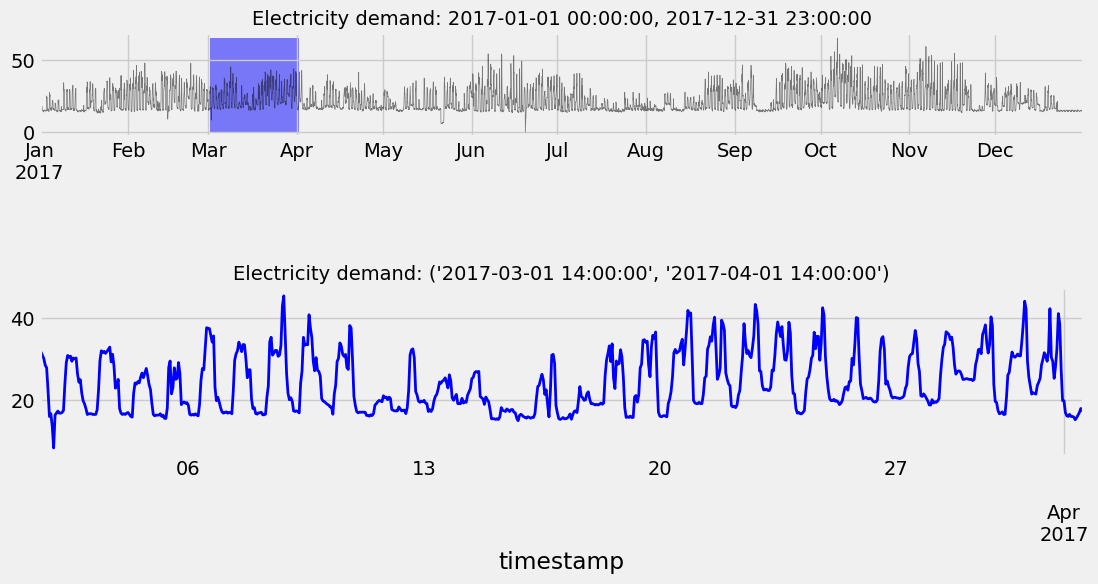

In [10]:
# concat all years
dfs = sorted(buildings_dataset_generator.building_datasets['Panther_education_Scarlett'], key=lambda x: x[0])
df = pd.concat([df[1] for df in dfs])

zoom = ('2017-03-01 14:00:00', '2017-04-01 14:00:00')

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)

main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[5:, :])

df['power'].plot(ax=main_ax, c='black', alpha=0.5, linewidth=0.5)
min_y = min(df['power'])
max_y = max(df['power'])
main_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')

df.loc[zoom[0]: zoom[1]]['power'].plot(ax=zoom_ax, color='blue', linewidth=2)

main_ax.set_title(f'Electricity demand: {df.index.min()}, {df.index.max()}', fontsize=14)
zoom_ax.set_title(f'Electricity demand: {zoom}', fontsize=14)
plt.subplots_adjust(hspace=1)

## Step 4: Visualize load time series as a PyTorch Dataset

In [34]:
# Automatic loading from Parquet to Pandas not yet implemented, 
# although this can be accomplished manually by loading the 
# Parquet files with pyarrow directly for a single building.

# We can load `buildings-900k-test` as a PyTorch Dataset
buildings_dataset_generator = load_torch_dataset('buildings-900k-test') 

# Access a dictionary mapping building names to distinct PyTorch Datasets
building_names = buildings_dataset_generator.building_datasets.keys()

In [ ]:
print(building_names)

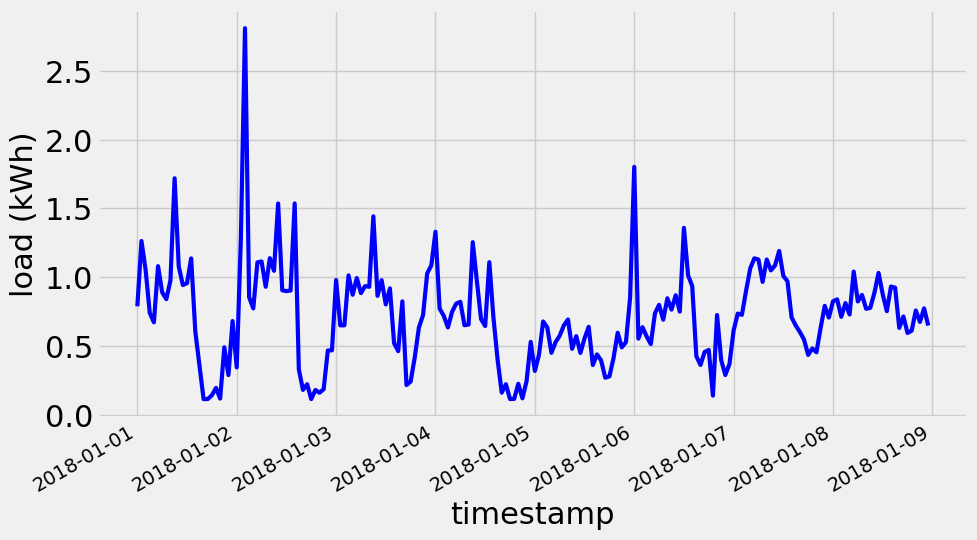

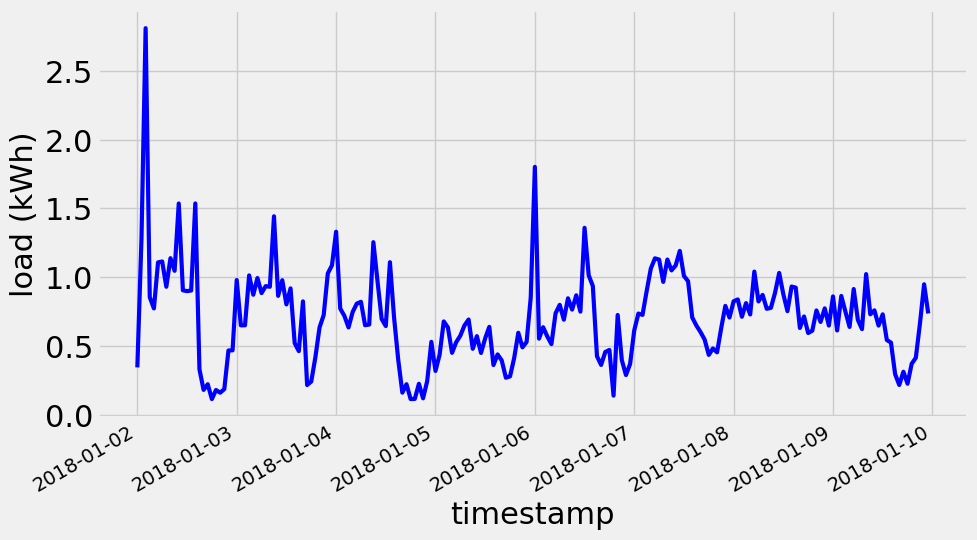

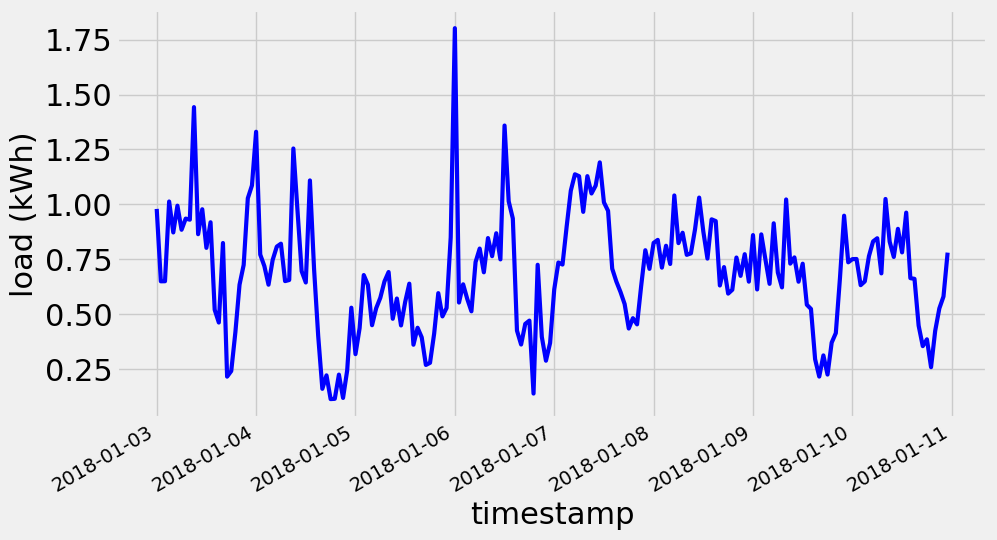

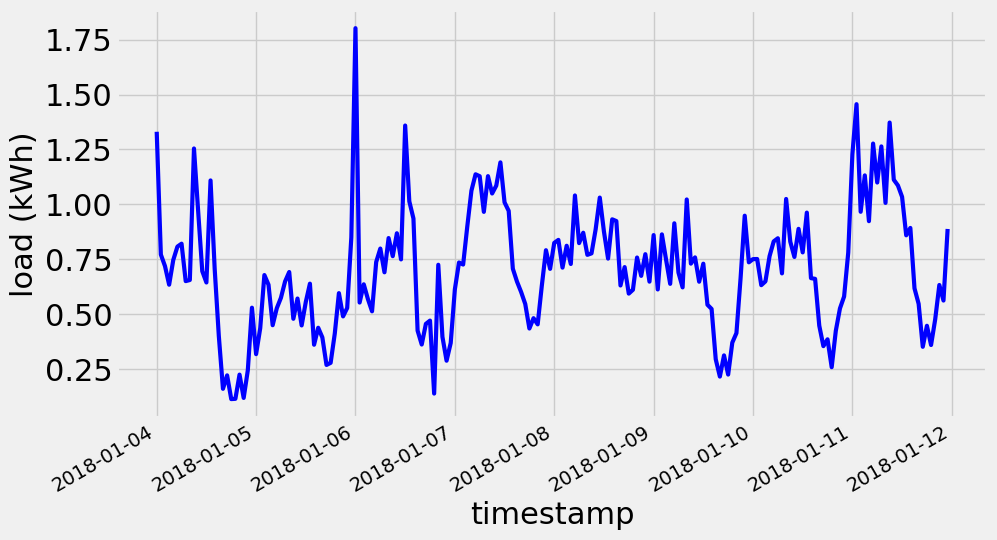

In [35]:
# Get a specific building by PUMA ID and building ID
torch_building_dataset = buildings_dataset_generator.building_datasets['residential_puma=G06000702/233130']
timestamp_transform = TimestampTransform()

# You can iterate over individual samples.
# We use a 24-hour sliding window to create samples.
for i in range(4):
    sample = torch_building_dataset[i]
    load = sample['load']

    timestamp = np.concatenate([
        sample['day_of_year'],    
        sample['day_of_week'],
        sample['hour_of_day']],-1)
    timestamp = timestamp_transform.undo_transform(timestamp)
    dt = np.datetime64(f'2018-01-01') + np.timedelta64(1, 'D') * (timestamp[...,0]-1) + np.timedelta64(1, 'h') * timestamp[...,-1]

    plt.figure(figsize=(10,6))
    plt.plot(dt.reshape(-1), load.reshape(-1), color='blue', linewidth=3)
    
    plt.ylabel('load (kWh)', fontsize=22)
    plt.xlabel('timestamp', fontsize=22)
    plt.yticks(fontsize=22)
    plt.xticks(fontsize=14)
    plt.gcf().autofmt_xdate()
    #ax = plt.gca()
    #ax.xaxis.set_major_formatter(dates.DateFormatter('%H'))  # hours and minutes
    plt.show()
    